In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid', {'grid.linestyle': '--'})

In [2]:
# load all data
data = pd.read_csv('household_power_consumption.csv', infer_datetime_format=True,
                   parse_dates=['datetime'], index_col=['datetime'])
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
datetime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


In [3]:
data.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
Sub_metering_4           25979
dtype: int64

## Fill the null values

In [4]:
# Filling missing values by Imputation - Forward Fill

data_ffill = data.fillna(method='ffill')
data_ffill.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Sub_metering_4           0
dtype: int64

In [5]:
# Filling missing values by Imputation - Backward Fill

data_bfill = data.fillna(method='bfill')
data_bfill.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Sub_metering_4           0
dtype: int64

## Downsampling & Upsampling

In [6]:
data_monthly = data_bfill.resample('M').mean()
data_monthly.index

DatetimeIndex(['2006-12-31', '2007-01-31', '2007-02-28', '2007-03-31',
               '2007-04-30', '2007-05-31', '2007-06-30', '2007-07-31',
               '2007-08-31', '2007-09-30', '2007-10-31', '2007-11-30',
               '2007-12-31', '2008-01-31', '2008-02-29', '2008-03-31',
               '2008-04-30', '2008-05-31', '2008-06-30', '2008-07-31',
               '2008-08-31', '2008-09-30', '2008-10-31', '2008-11-30',
               '2008-12-31', '2009-01-31', '2009-02-28', '2009-03-31',
               '2009-04-30', '2009-05-31', '2009-06-30', '2009-07-31',
               '2009-08-31', '2009-09-30', '2009-10-31', '2009-11-30',
               '2009-12-31', '2010-01-31', '2010-02-28', '2010-03-31',
               '2010-04-30', '2010-05-31', '2010-06-30', '2010-07-31',
               '2010-08-31', '2010-09-30', '2010-10-31', '2010-11-30'],
              dtype='datetime64[ns]', name='datetime', freq='M')

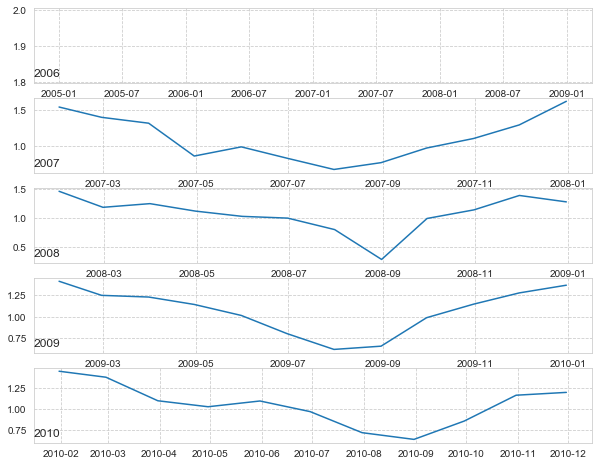

In [7]:
years = ['2006', '2007', '2008', '2009', '2010']
plt.figure(figsize=(10,8))

for i in range(len(years)):
    ax = plt.subplot(len(years), 1, i+1)
    year = years[i]
    result = data_monthly[year]
    plt.plot(result['Global_active_power'])
    plt.title(year, y=0, loc='left')
    
plt.show()

In [8]:
data_daily = data_bfill.resample('D').mean()
data_daily.index

DatetimeIndex(['2006-12-16', '2006-12-17', '2006-12-18', '2006-12-19',
               '2006-12-20', '2006-12-21', '2006-12-22', '2006-12-23',
               '2006-12-24', '2006-12-25',
               ...
               '2010-11-17', '2010-11-18', '2010-11-19', '2010-11-20',
               '2010-11-21', '2010-11-22', '2010-11-23', '2010-11-24',
               '2010-11-25', '2010-11-26'],
              dtype='datetime64[ns]', name='datetime', length=1442, freq='D')

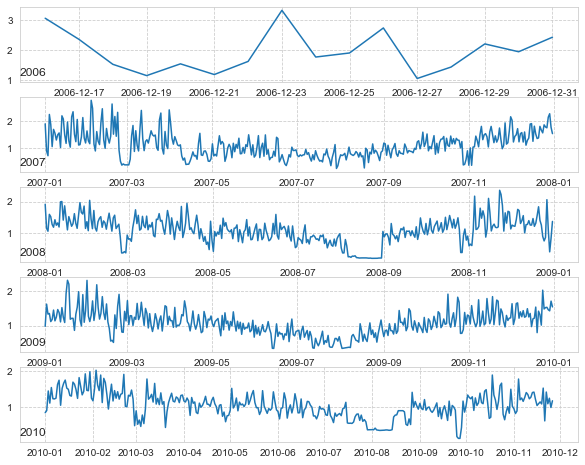

In [9]:
plt.figure(figsize=(10,8))

for i in range(len(years)):
    ax = plt.subplot(len(years), 1, i+1)
    year = years[i]
    result = data_daily[year]
    plt.plot(result['Global_active_power'])
    plt.title(year, y=0, loc='left')
    
plt.show()

## Times Series Specific Exploratory Methods

In [10]:
import statsmodels.api as sm
from pylab import rcParams

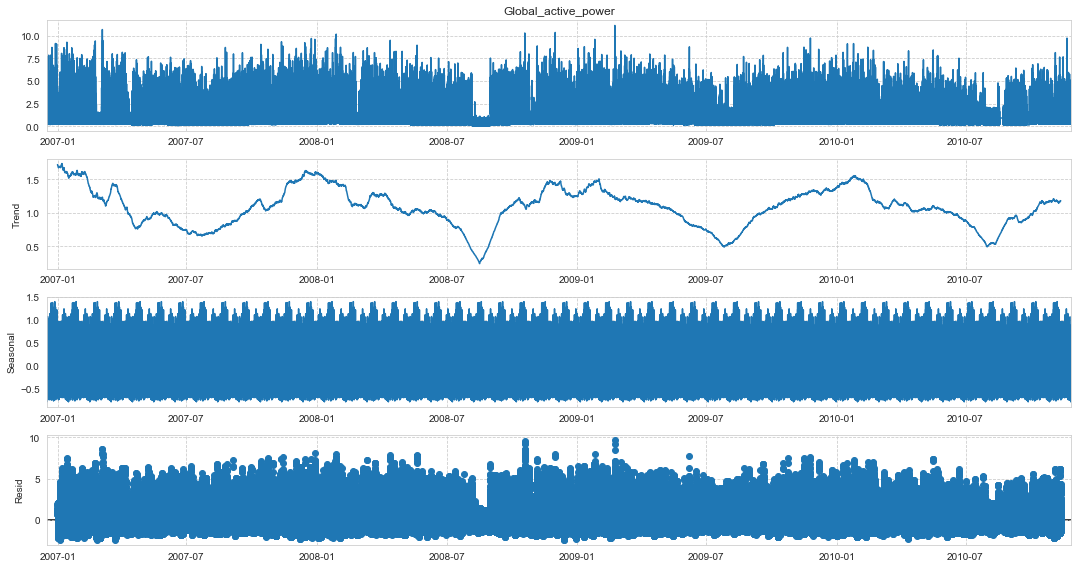

In [11]:
rcParams['figure.figsize'] = 15, 8
decompose_series = sm.tsa.seasonal_decompose(data_ffill['Global_active_power'], model='additive', period = 60*24*30)
decompose_series.plot()
plt.show() 

In [12]:
len(data_monthly), len(data_daily)

(48, 1442)

In [13]:
from statsmodels.tsa.stattools import adfuller


def adfuller_metrics(df, feature):
    if len(df) == 48:
        print('METRICS FOR {} WHEN THE DATA IS SAMPLED MONTHLY:'.format(feature))
    elif len(df) == 1442:
        print('METRICS FOR {} WHEN THE DATA IS SAMPLED DAILY:'.format(feature))
        
    print('--------------------------------------------------')
    print('--------------------------------------------------')
    adf_result = adfuller(df[feature])
    print(f'ADF Statistic: {adf_result[0]}')
    print(f'p-value: {adf_result[1]}')
    print(f'No. of lags used: {adf_result[2]}')
    print(f'No. of observations used : {adf_result[3]}')
    print('Critical Values:')

    for k, v in adf_result[4].items():
        print(f'   {k}: {v}')

### Voltage

In [14]:
adfuller_metrics(data_daily, 'Voltage')
adfuller_metrics(data_monthly, 'Voltage')

METRICS FOR Voltage WHEN THE DATA IS SAMPLED DAILY:
--------------------------------------------------
--------------------------------------------------
ADF Statistic: -3.732876443909846
p-value: 0.003673776776804457
No. of lags used: 21
No. of observations used : 1420
Critical Values:
   1%: -3.4349634933241084
   5%: -2.8635775363009244
   10%: -2.5678547733584605
METRICS FOR Voltage WHEN THE DATA IS SAMPLED MONTHLY:
--------------------------------------------------
--------------------------------------------------
ADF Statistic: -2.5830134022383375
p-value: 0.09655911979111459
No. of lags used: 1
No. of observations used : 46
Critical Values:
   1%: -3.5812576580093696
   5%: -2.9267849124681518
   10%: -2.6015409829867675


In [15]:
data_daily.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Sub_metering_4'],
      dtype='object')

### Global Active Power

In [16]:
adfuller_metrics(data_daily, 'Global_active_power')
adfuller_metrics(data_monthly, 'Global_active_power')

METRICS FOR Global_active_power WHEN THE DATA IS SAMPLED DAILY:
--------------------------------------------------
--------------------------------------------------
ADF Statistic: -3.7347586808460083
p-value: 0.0036499731073698304
No. of lags used: 22
No. of observations used : 1419
Critical Values:
   1%: -3.434966750462565
   5%: -2.8635789736973725
   10%: -2.5678555388041384
METRICS FOR Global_active_power WHEN THE DATA IS SAMPLED MONTHLY:
--------------------------------------------------
--------------------------------------------------
ADF Statistic: -4.616468415751827
p-value: 0.00012043644200149154
No. of lags used: 9
No. of observations used : 38
Critical Values:
   1%: -3.6155091011809297
   5%: -2.941262357486514
   10%: -2.6091995013850418


### Global Reactive Power

In [17]:
adfuller_metrics(data_daily, 'Global_reactive_power')
adfuller_metrics(data_monthly, 'Global_reactive_power')

METRICS FOR Global_reactive_power WHEN THE DATA IS SAMPLED DAILY:
--------------------------------------------------
--------------------------------------------------
ADF Statistic: -4.234326269191538
p-value: 0.0005760796983473496
No. of lags used: 22
No. of observations used : 1419
Critical Values:
   1%: -3.434966750462565
   5%: -2.8635789736973725
   10%: -2.5678555388041384
METRICS FOR Global_reactive_power WHEN THE DATA IS SAMPLED MONTHLY:
--------------------------------------------------
--------------------------------------------------
ADF Statistic: -3.7704265952073017
p-value: 0.0032248034659439293
No. of lags used: 3
No. of observations used : 44
Critical Values:
   1%: -3.5885733964124715
   5%: -2.929885661157025
   10%: -2.6031845661157025


## Helper Function
___
I want to create a helper function to identify the features with their respective `p-value` for the upsampled and downsampled data.

In [18]:
def stat_id(df):
    features = df.columns
    non_stat = list()
    stat = list()
    
    for feature in features:
        adf_result = adfuller(df[feature])
        p_value = adf_result[1]
        if p_value > 0.05:
            non_stat.append(feature)
        else:
            stat.append(feature)
    
    if len(df) == 48:
        print('According to the p-value, when the data is sampled MONTHLY:-')
    elif len(df) == 1442:
        print('According to the p-value, when the data is sampled DAILY:-')
    print('STATIONARY FEATURES:')
    print('--------------------')
    for i in stat:
        print(i)
    
    if len(non_stat) > 0:
        print()
        print('NON-STATIONARY FEATURES:')
        print('--------------------')
        for i in non_stat:
            print(i)

In [19]:
stat_id(data_daily)

According to the p-value, when the data is sampled DAILY:-
STATIONARY FEATURES:
--------------------
Global_active_power
Global_reactive_power
Voltage
Global_intensity
Sub_metering_1
Sub_metering_2
Sub_metering_3
Sub_metering_4


In [20]:
stat_id(data_monthly)

According to the p-value, when the data is sampled MONTHLY:-
STATIONARY FEATURES:
--------------------
Global_active_power
Global_reactive_power
Global_intensity
Sub_metering_1
Sub_metering_2
Sub_metering_3

NON-STATIONARY FEATURES:
--------------------
Voltage
Sub_metering_4


## Monthly Predictions

In [21]:
from fbprophet import Prophet

In [22]:
df_month = data_monthly.reset_index()
df_month.head(2)

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
0,2006-12-31,1.901537,0.131400,241.440835,8.030969,1.251864,2.216312,7.409847,20.814259
1,2007-01-31,1.546085,0.132683,240.904831,6.547133,1.264180,1.775851,7.383759,15.344291


In [23]:
df_month = df_month[['datetime','Global_active_power']]
df_month.head(2)

,datetime,Global_active_power
0,2006-12-31,1.901537
1,2007-01-31,1.546085


In [24]:
mapping = {'datetime':'ds', 'Global_active_power':'y'}
df_month = df_month.rename(mapping, axis=1)
df_month.head(2)

,ds,y
0,2006-12-31,1.901537
1,2007-01-31,1.546085


In [25]:
model = Prophet(weekly_seasonality=True, daily_seasonality=True)
model.fit(df_month)

future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)
forecast.shape

C:\Users\Sulaimam\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


(60, 22)

In [26]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-12-31,0.069717,1.597774,1.774155,0.069717,0.069717,1.617026,1.617026,1.617026,1.115453,...,0.084774,0.084774,0.084774,0.416799,0.416799,0.416799,0.0,0.0,0.0,1.686742
1,2007-01-31,0.066454,1.393629,1.577171,0.066454,0.066454,1.417997,1.417997,1.417997,1.115453,...,-0.005900,-0.005900,-0.005900,0.308445,0.308445,0.308445,0.0,0.0,0.0,1.484451
2,2007-02-28,0.063507,1.297599,1.476518,0.063507,0.063507,1.321026,1.321026,1.321026,1.115453,...,-0.005900,-0.005900,-0.005900,0.211474,0.211474,0.211474,0.0,0.0,0.0,1.384533
3,2007-03-31,0.060244,1.189788,1.376045,0.060244,0.060244,1.225827,1.225827,1.225827,1.115453,...,-0.010400,-0.010400,-0.010400,0.120774,0.120774,0.120774,0.0,0.0,0.0,1.286070
4,2007-04-30,0.057086,0.903913,1.079771,0.057086,0.057086,0.933796,0.933796,0.933796,1.115453,...,0.039164,0.039164,0.039164,-0.220821,-0.220821,-0.220821,0.0,0.0,0.0,0.990882


In [27]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']].head()
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries
# so here we can compare btw the predictions (yhat) and the trend and tell that their values are very close

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2006-12-31,1.686742,1.597774,1.774155,0.069717,0.069717,0.069717
1,2007-01-31,1.484451,1.393629,1.577171,0.066454,0.066454,0.066454
2,2007-02-28,1.384533,1.297599,1.476518,0.063507,0.063507,0.063507
3,2007-03-31,1.286070,1.189788,1.376045,0.060244,0.060244,0.060244
4,2007-04-30,0.990882,0.903913,1.079771,0.057086,0.057086,0.057086


C:\Users\Sulaimam\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Sulaimam\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


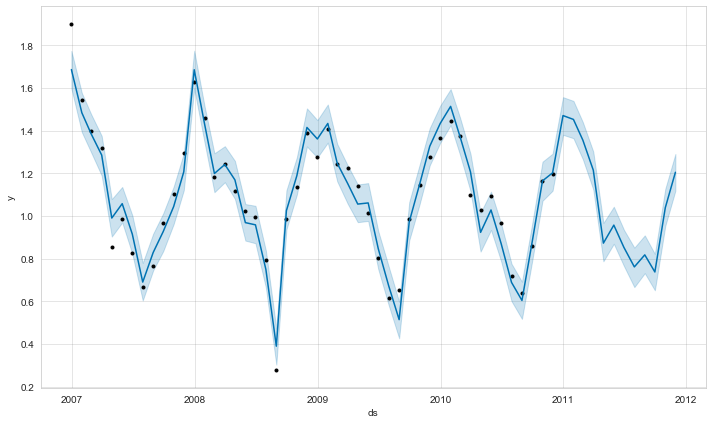

In [28]:
model.plot(forecast)
plt.show()

## Daily Predictions

In [34]:
def plot(df):
    df = df.reset_index()
    df = df[['datetime','Global_active_power']]
    
    mapping = {'datetime':'ds', 'Global_active_power':'y'}
    df = df.rename(mapping, axis=1)
    
    model = Prophet(weekly_seasonality=True, daily_seasonality=True)
    model.fit(df)
    
    if len(df) == 48:
        future = model.make_future_dataframe(periods=12, freq='M')
    elif len(df) == 1442:
        future = model.make_future_dataframe(periods=200, freq='D')
    forecast = model.predict(future)
    
    model.plot(forecast)
    if len(df) == 48:
        plt.title('PREDICTION PLOT FOR DOWNSAMPLED TIME SERIES DATA - MONTHLY')
    elif len(df) == 1442:
        plt.title('PREDICTION PLOT FOR UPSAMPLED TIME SERIES DATA - DAILY')
        
    plt.show()

C:\Users\Sulaimam\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
C:\Users\Sulaimam\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Sulaimam\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


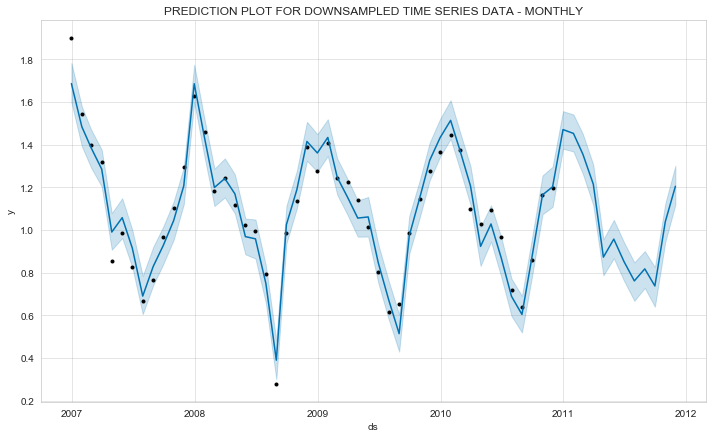

In [35]:
plot(data_monthly)

C:\Users\Sulaimam\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
C:\Users\Sulaimam\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Sulaimam\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


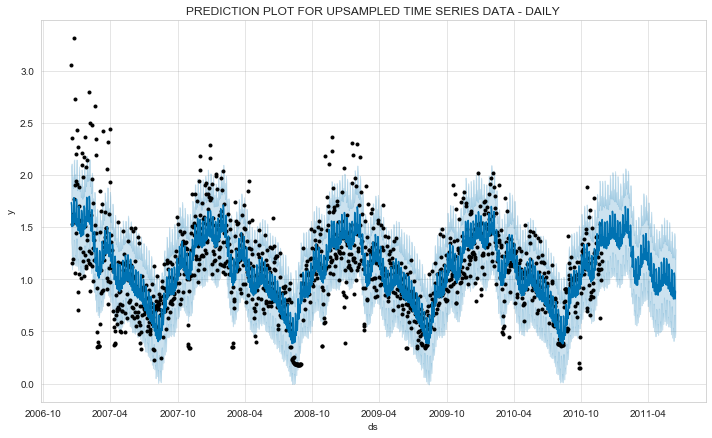

In [36]:
plot(data_daily)

In [32]:
# data_daily.index

In [33]:
# data_monthly.index